# <u>APPLIED DATA SCIENCE 1 - CLUSTERING AND FITTING</u>

## Necessary imports

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import skew, kurtosis

## Loading and Analysing the dataset

In [37]:
file_path = './data.csv'
data = pd.read_csv(file_path)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2001 non-null   int64  
 1   Age                     2001 non-null   int64  
 2   Gender                  2001 non-null   object 
 3   Item Purchased          2001 non-null   object 
 4   Category                2001 non-null   object 
 5   Purchase Amount (USD)   2001 non-null   int64  
 6   Location                2001 non-null   object 
 7   Size                    2001 non-null   object 
 8   Color                   2001 non-null   object 
 9   Season                  2001 non-null   object 
 10  Review Rating           2001 non-null   float64
 11  Subscription Status     2001 non-null   object 
 12  Shipping Type           2001 non-null   object 
 13  Discount Applied        2001 non-null   object 
 14  Promo Code Used         2001 non-null   

In [45]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [47]:
X = data[['Age', 'Purchase Amount (USD)']].dropna()

X.head()

,Age,Purchase Amount (USD)
0,55,53
1,19,64
2,50,73
3,21,90
4,45,49


## Scatter Plot (Relational)

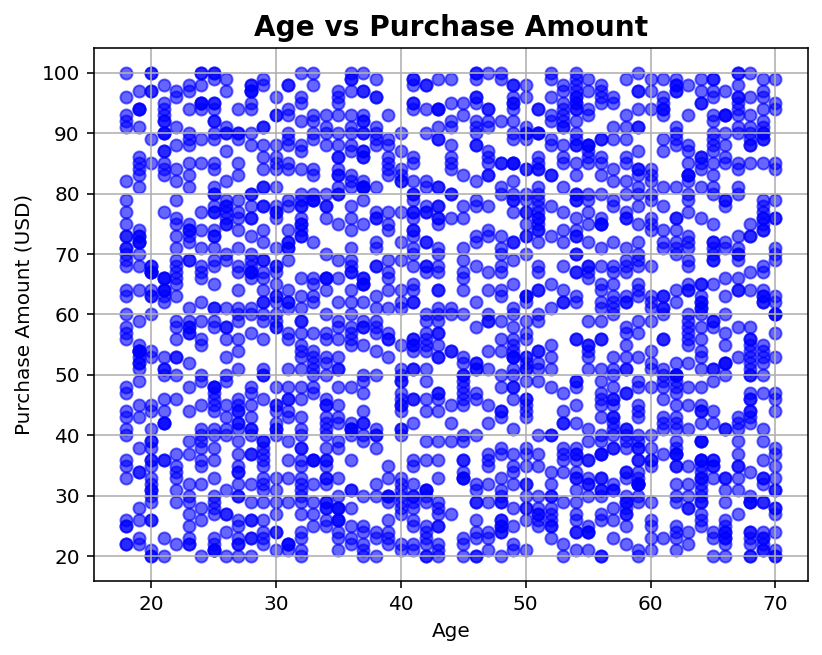

In [355]:
def plot_scatter(X):
    """
    Function to plot a scatter plot showing the relation between Age and Purchase Amount.
    """
    plt.figure(dpi=144)
    plt.scatter(X['Age'], X['Purchase Amount (USD)'], alpha=0.6, c='blue')
    plt.title('Age vs Purchase Amount', weight=700, size=14)
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.grid(True)
    plt.show()

plot_scatter(X)

## Bar Graph (Categorial)

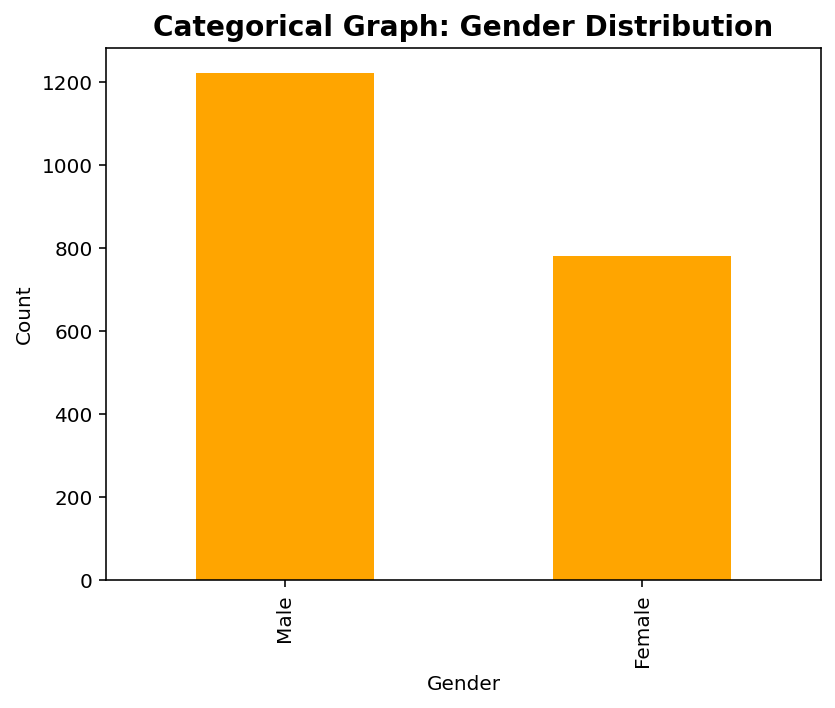

In [362]:
def plot_bar(data):
    """
    Function to plot a categorical graph comparing different categories like Gender.
    """
    plt.figure(dpi=144)
    gender_counts = data['Gender'].value_counts()
    gender_counts.plot(kind='bar', color='orange')
    plt.title('Categorical Graph: Gender Distribution', weight=700, size=14)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

plot_bar(data)

## Histogram Plot (Statistical)

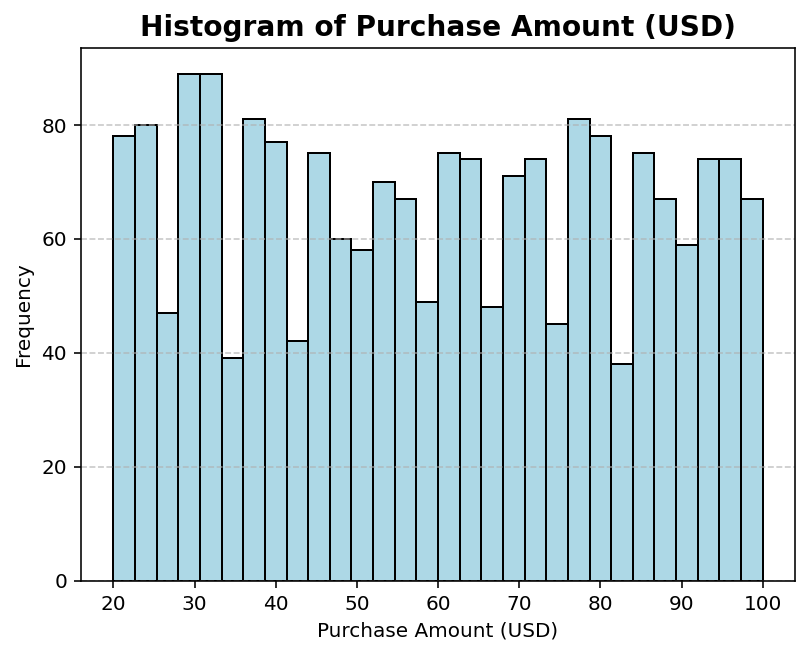

In [366]:
def plot_histogram(X):
    """
    Function to plot a histogram of the Purchase Amount (USD).
    """
    plt.figure(dpi=144)
    X['Purchase Amount (USD)'].plot(kind='hist', bins=30, color='lightblue', edgecolor='black')
    plt.title('Histogram of Purchase Amount (USD)', weight=700, size=14)
    plt.xlabel('Purchase Amount (USD)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_histogram(X)


## Elbow Plot (Clustering)

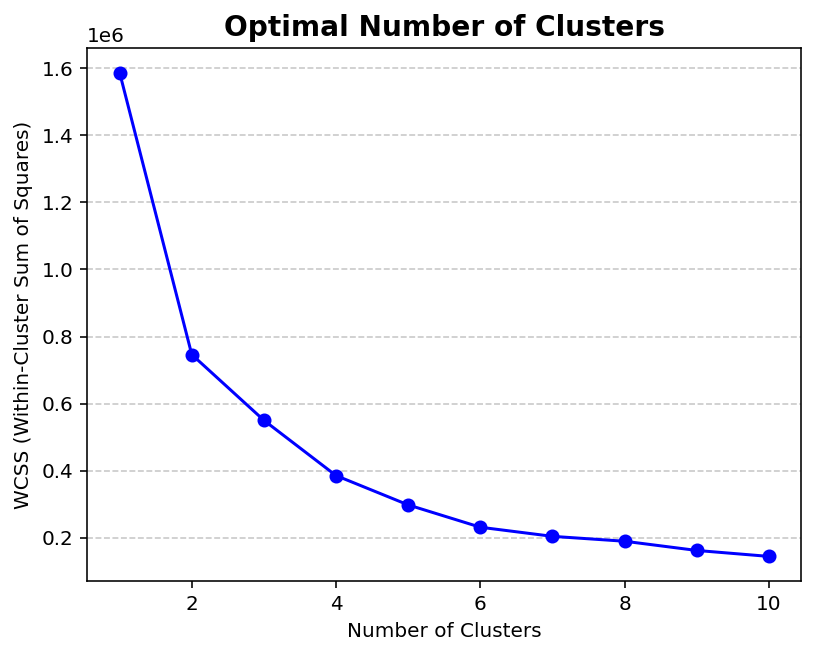

In [370]:
def plot_elbow(X):
    """
    Function to plot the elbow method for finding the optimal number of clusters.
    """
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.figure(dpi=144)
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
    plt.title('Optimal Number of Clusters', weight=700, size=14)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)    
    plt.show()

plot_elbow(X)


## Calculating Statistical Depth

In [152]:
def calculate_statistical_depth(X):
    describe_stats = X.describe()
    print("Statistical Description:")
    print(describe_stats)

    print("\nSkewness and Kurtosis:")
    print(f"Skewness: {skew(X['Purchase Amount (USD)'])}")
    print(f"Kurtosis: {kurtosis(X['Purchase Amount (USD)'])}")

calculate_statistical_depth(X)

Statistical Description:
               Age  Purchase Amount (USD)
count  2001.000000            2001.000000
mean     44.192404              59.415292
std      15.380620              23.599342
min      18.000000              20.000000
25%      31.000000              38.000000
50%      44.000000              59.000000
75%      58.000000              80.000000
max      70.000000             100.000000

Skewness and Kurtosis:
Skewness: 0.020838394610276142
Kurtosis: -1.2292543198721937


---

# Clustering

#### Performing Clustering

In [218]:
def perform_clustering(X, n_clusters=3):
    """
    Perform K-Means clustering and return the cluster labels and centers.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans, kmeans.labels_, kmeans.cluster_centers_

kmeans, labels, centers = perform_clustering(X)


#### Visualizing Clustering

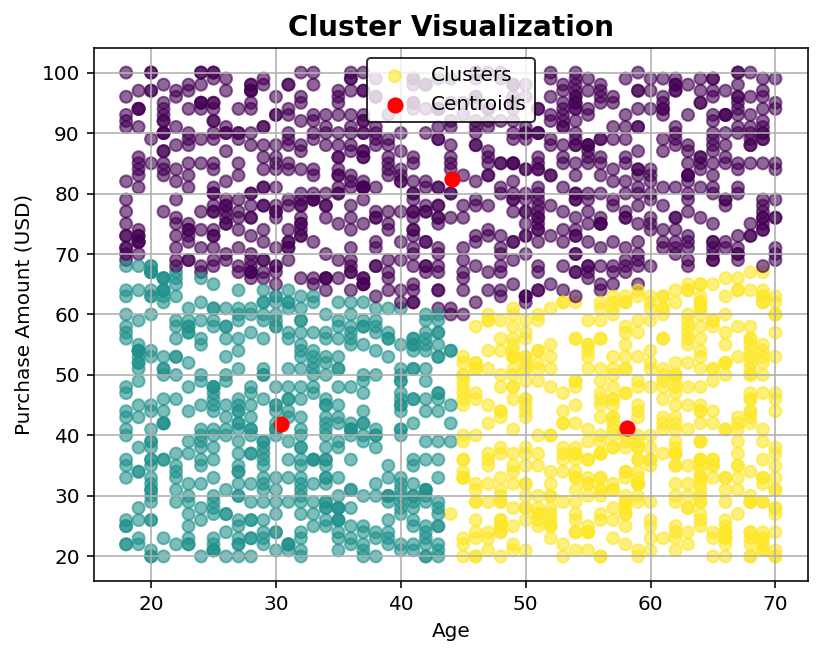

In [374]:
def plotting_clustering(X, labels, centers):
    """
    Visualize the clustering result with scatter plot and cluster centers.
    """
    plt.figure(dpi=144)
    plt.scatter(X['Age'], X['Purchase Amount (USD)'], c=labels, cmap='viridis', alpha=0.6, label='Clusters')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='.', s=200, label='Centroids')
    plt.title('Cluster Visualization', weight=700, size=14)
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.legend(loc="best", frameon=True, facecolor='white', edgecolor='black')
    plt.grid(True)
    plt.show()

plotting_clustering(X, labels, centers)


# Fitting

#### Performing Fitting (Linear Regression)

In [237]:
def perform_fitting(X):
    """
    Fit a linear regression model and return the model and predictions.
    """
    model = LinearRegression()
    model.fit(X[['Age']], X['Purchase Amount (USD)'])
    predictions = model.predict(X[['Age']])
    return model, predictions

model, predictions = perform_fitting(X)


#### Visualizing Fitting

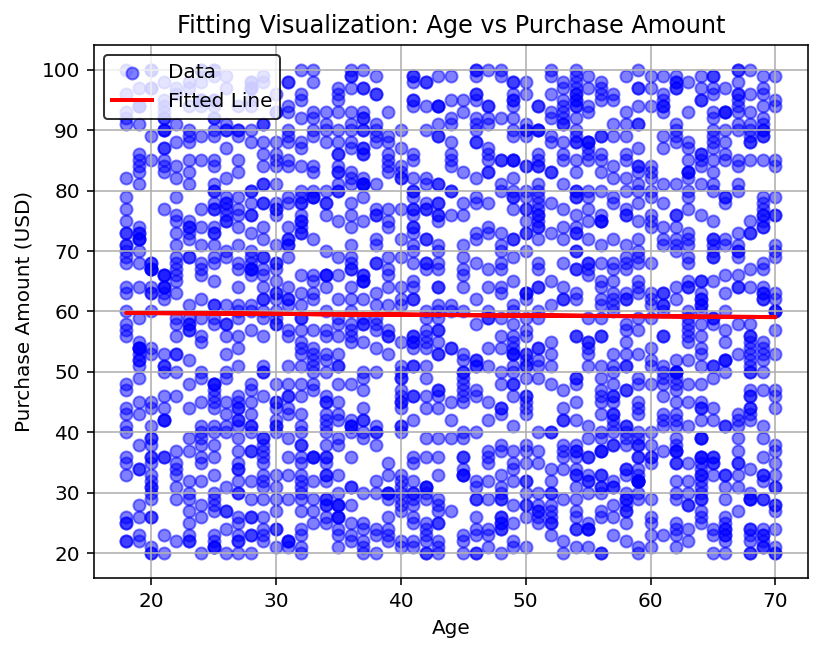

In [378]:
def plotting_fitting(X, model, predictions):
    """
    Visualize the regression line along with the data points.
    """
    plt.figure(dpi=144)
    plt.scatter(X['Age'], X['Purchase Amount (USD)'], alpha=0.5, c='blue', label='Data')
    plt.plot(X['Age'], predictions, color='red', linewidth=2, label='Fitted Line')
    plt.title('Fitting Visualization: Age vs Purchase Amount')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.legend(edgecolor='black', loc='best')
    plt.grid(True)
    plt.show()

plotting_fitting(X, model, predictions)


## Predictions

#### Clustering Prediction

In [380]:
def predict_clustering(kmeans, new_data):
    """
    Predict the cluster for new data points.
    """
    return kmeans.predict(new_data)

new_data = pd.DataFrame([[30, 100]], columns=['Age', 'Purchase Amount (USD)'])
predicted_cluster = predict_clustering(kmeans, new_data)
print(f"Predicted cluster index for new data: {predicted_cluster[0]}")

Predicted cluster index for new data: 0


#### Fitting Prediction

In [382]:
def predict_fitting(model, new_data):
    """
    Predict the purchase amount for new data points based on the fitted linear model.
    """
    return model.predict(new_data)

new_data_fitting = pd.DataFrame([[30]], columns=['Age'])
predicted_purchase = predict_fitting(model, new_data_fitting)
print(f"Predicted Purchase Amount for Age 30: {predicted_purchase[0]}")


Predicted Purchase Amount for Age 30: 59.60313039923349
